In [1]:
import pandas as pd
import stravafxns as strava
import requests
import urllib3
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas.api.types import CategoricalDtype

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [2]:
# access_token = strava.getAccess()
access_token = "f5f54bfa94a26b71d6c96b36800f8b01a5229cf5"

Requesting Token...

Access Token = f5f54bfa94a26b71d6c96b36800f8b01a5229cf5



In [5]:
actdf = pd.read_csv("allactivities.csv")

In [6]:
actdf

,Unnamed: 0,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,...,has_kudoed,suffer_score,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_temp,elev_high,elev_low
0,0,2,Free Ride 75,20403.3,2760,2760,0.0,Ride,12.0,6115975461,...,False,131.0,5724645,1,a6115975461,NaN,2,NaN,NaN,NaN
1,1,2,Spanish Needle -2,16435.7,2251,2251,0.0,Ride,12.0,6111269022,...,False,105.0,5724645,1,a6111269022,NaN,2,NaN,NaN,NaN
2,2,2,El Cajon,34229.2,4500,4500,0.0,Ride,12.0,6106622067,...,False,244.0,5724645,1,a6106622067,NaN,2,NaN,NaN,NaN
3,3,2,More leaves!,182712.0,27995,30148,3257.0,Ride,10.0,6088673215,...,False,736.0,5724645,1,a6088673215,{fnqFnou_ScJz@[~hBihAnw@_n@jNic@bo@uG}EePbVUrz...,2,12.0,2811.4,1589.6
4,4,2,Afternoon Ride,3309.9,1016,1347,20.5,Ride,10.0,6059600354,...,False,8.0,5724645,1,a6059600354,ofnqFvwt_SAeDEcBBoGLaBR{@B{AA}BF_A@BA@EyC@oLCm...,2,NaN,1634.4,1612.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,81,2,Morning Ride,28869.0,4562,4664,265.3,Ride,NaN,172508236,...,False,33.0,5724645,1,a172508236,ajljG~felL}@nByIHgNzHcZyAi_ApQsXfP`@pRcl@hq@wI...,2,NaN,161.1,52.4
2882,82,2,Boulevard double,11565.3,3103,3327,37.5,Run,3.0,172055880,...,False,175.0,5724645,1,a172055880,seoiGx|zkLdBmG}BaHcGyIyGGmB}IqC}BsU{EyOiJmTVmA...,2,NaN,13.3,-0.6
2883,83,2,Hampton,6543.8,1723,1874,0.0,Run,0.0,171210205,...,False,82.0,5724645,1,a171210205,kahyFlaiwLoBc@|FaIhN{f@ca@cHkOjKiIx@sc@{JkCnGi...,2,NaN,9.1,-0.2
2884,84,2,Afternoon Ride,29467.5,4310,4730,254.7,Ride,NaN,170023397,...,False,45.0,5724645,1,a170023397,ohwhFzv{{M_f@|`CaY~`@`E`YyKd\B|L|AlGeC|OiF|@mB...,2,NaN,215.7,111.8


In [18]:
ids = actdf['id'].tolist()
ids
# allActData = strava.getActivity(ids[0],access_token)
# for id in ids:
#     if (id == ids[0]):
#         allActData = strava.getActivity(id,access_token)
#     else:
#         ride = strava.getActivity(id,access_token)
#         allActData.append(ride)
#         print(allActData)
allActData.head()


,message,errors
0,Rate Limit Exceeded,"[{'resource': 'Application', 'field': 'rate li..."


177.95761319811456
Power Norm = 1
Power Norm = 3
Power Norm = 6
Power Norm = 10
Power Norm = 15
Power Norm = 21
Power Norm = 26
Power Norm = 30
Power Norm = 33
Power Norm = 35
177.9263329728406


Text(0.5, 1.0, 'Watts vs. Time')

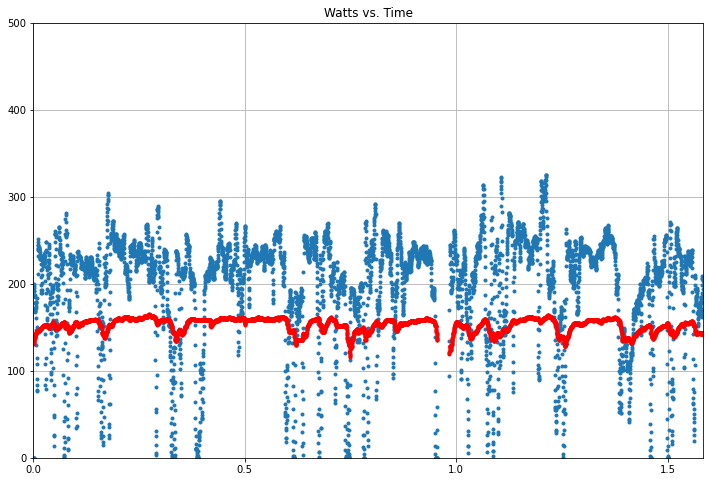

In [118]:
fig = plt.figure(figsize=(12,8)) #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
xval = 'time.data'
yval = 'watts.data'
zval = 'heartrate.data'
x = np.asarray(ride[xval][0])  #convert data to numpy array
y = np.asarray(ride[yval][0])

#Powersmoothing
#First, fill null values
for i, power in enumerate(y):
    if power == None:
        y[i] = 0

print(np.average(y))
#Then smooth power (with a weighting!)
duration = 5       #okay, half duration...
smoothPower = []

powerNorm = 0
for i in range(-duration,duration):
        powerNorm += duration+1 - np.abs(i)
        print('Power Norm = '+ str(powerNorm))

for i in range(duration):
    smoothPower.append(0.0)
for i in range(duration,len(y)-duration):
    averagePow = 0.0
    for j in range(-duration,duration):
        powerWeight = duration+1 - np.abs(j)
        averagePow = averagePow + y[i+j]*powerWeight
    smoothPower.append(averagePow/powerNorm)
for i in range(duration):
    smoothPower.append(0.0)

z = np.asarray(ride[zval][0])
x = x/60/60 #unit conversion
z = z
ax1.plot(x, smoothPower,'.',x,z,'r.') #plot data points in scatter plot on ax1
ax1.set_xlim(0,x[int(len(x)/5)])
ax1.set_ylim(0,500)
xmin, xmax = ax1.get_xlim()
ax1.set_xticks(np.arange(0, np.round(xmax), 0.5)) 
ax1.grid()
ax1.set_title((yval.split(".")[0].capitalize() + " vs. " + xval.split(".")[0].capitalize()))